## Pandas DataFrame Basics

Loading CSV/TSV data to pandas, then examine the data frame object using `shape`, `columns`, `dtypes` and `info()`.

In [1]:
# Data can be downloaded from https://raw.githubusercontent.com/jennybc/gapminder/master/inst/extdata/gapminder.tsv

import pandas as pd

df = pd.read_csv("gapminder.tsv", sep="\t")

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape

(1704, 6)

In [8]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [9]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

### Subsetting DataFrame

`loc` uses the index label and `iloc` uses the index number. Don't get confused!

In [16]:
df[["country", "year", "pop"]].head()

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [17]:
df.loc[0] # using index label

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [21]:
df.loc[-1] # label "-1" doesn't exist

KeyError: 'the label [-1] is not in the [index]'

In [19]:
df.iloc[0] # using row index number

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [20]:
df.iloc[-1]

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object

In [22]:
df.loc[:5, ["country", "year"]]

,country,year
0,Afghanistan,1952
1,Afghanistan,1957
2,Afghanistan,1962
3,Afghanistan,1967
4,Afghanistan,1972
5,Afghanistan,1977


In [30]:
df.iloc[:5, [0, 2]]

,country,year
0,Afghanistan,1952
1,Afghanistan,1957
2,Afghanistan,1962
3,Afghanistan,1967
4,Afghanistan,1972


### Summarization



In [31]:
df.groupby("year")["lifeExp"].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [32]:
df.groupby("year").mean()

,lifeExp,pop,gdpPercap
year,,,
1952,49.057620,1.695040e+07,3725.276046
1957,51.507401,1.876341e+07,4299.408345
1962,53.609249,2.042101e+07,4725.812342
1967,55.678290,2.265830e+07,5483.653047
1972,57.647386,2.518998e+07,6770.082815
1977,59.570157,2.767638e+07,7313.166421
1982,61.533197,3.020730e+07,7518.901673
1987,63.212613,3.303857e+07,7900.920218
1992,64.160338,3.599092e+07,8158.608521


In [34]:
df_grouped_by = df.groupby(["year", "continent"])[["lifeExp", "gdpPercap"]].mean()

In [35]:
# To flatten group by, you can use `reset_index`

df_grouped_by.reset_index()

,year,continent,lifeExp,gdpPercap
0,1952,Africa,39.135500,1252.572466
1,1952,Americas,53.279840,4079.062552
2,1952,Asia,46.314394,5195.484004
3,1952,Europe,64.408500,5661.057435
4,1952,Oceania,69.255000,10298.085650
5,1957,Africa,41.266346,1385.236062
6,1957,Americas,55.960280,4616.043733
7,1957,Asia,49.318544,5787.732940
8,1957,Europe,66.703067,6963.012816
9,1957,Oceania,70.295000,11598.522455


### Basic Plot

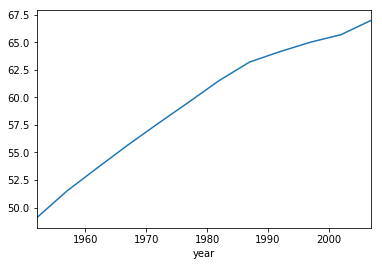

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

df.groupby("year")["lifeExp"].mean().plot()